In [78]:
import cvxpy as cp
import scipy as sc
import numpy as np
import numpy.random as npr
import lropt
import torch
from sklearn import datasets
import pandas as pd
from omegaconf import DictConfig
import os
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import hydra
import warnings
warnings.filterwarnings("ignore")
# plt.rcParams.update({
#     "text.usetex":True,
    
#     "font.size":24,
#     # "font.family": "serif"
# })


In [79]:
etas = [0.01,0.05,0.08,0.10,0.12,0.15,0.18,0.20,0.23,0.25]
objs = [1,5,10]
seeds1 = [0,1,2,3,4,5]
seeds2 = [6,7,8,9,10,11]
seeds3 = [12,13,14,15,16]

In [80]:
foldername1 = "/Users/irina.wang/Desktop/Princeton/Project2/lropt/multirun/2025-04-23/17-43-41/"
foldername2 = "/Users/irina.wang/Desktop/Princeton/Project2/lropt/multirun/2025-04-23/17-44-42/"
foldername3 = "/Users/irina.wang/Desktop/Princeton/Project2/lropt/multirun/2025-04-24/17-09-07/"

In [81]:
dfs_all = {}
quantiles = [0.25,0.75]
dfs = {}
running_ind = 0
for obj in objs:
    dfs_all[obj] = []
for eta in etas:
    for obj in objs:
        for seed in seeds1:
            newfolder = foldername1+str(running_ind)
            try:
                df = pd.read_csv(newfolder+"/vals.csv")
                dfs_all[obj].append(df)
            except:
                print(eta,obj,seed)
            running_ind += 1
running_ind = 0
for eta in etas:
    for obj in objs:
        for seed in seeds2:
            newfolder = foldername2+str(running_ind)
            try:
                df = pd.read_csv(newfolder+"/vals.csv")
                dfs_all[obj].append(df)
            except:
                print(eta,obj,seed)
            running_ind += 1
for obj in objs:
    dfs_all[obj] = pd.concat(dfs_all[obj])
collist = list(dfs_all[obj].columns)[5:]
ecollist = ["eta"]+ collist
for obj in objs:
    grouped = dfs_all[obj].groupby(["eta"], as_index=False)
    mean_vals = grouped[collist].mean().add_prefix("mean_")
    dfs[obj] = mean_vals
    for q in quantiles:
        quantile_values = grouped[collist].quantile(q)
        quantile_values = grouped[collist].quantile(q).add_prefix(str(q)+"_")
        dfs[obj] = pd.concat([dfs[obj], quantile_values], axis=1)
    dfs[obj].to_csv("gamma_"+str(obj)+"_values.csv")

0.01 1 2
0.01 1 3
0.01 1 5
0.01 5 0
0.01 5 1
0.01 5 2
0.01 5 4
0.01 5 5
0.01 10 0
0.01 10 1
0.01 10 2
0.01 10 3
0.01 10 4
0.01 10 5
0.05 10 0
0.05 10 1
0.05 10 4
0.05 10 5
0.08 10 0
0.08 10 1
0.08 10 4
0.01 1 8
0.01 1 9
0.01 1 11
0.01 5 7
0.01 5 8
0.01 5 9
0.01 5 10
0.01 5 11
0.01 10 6
0.01 10 7
0.01 10 8
0.01 10 9
0.01 10 10
0.01 10 11
0.05 10 11
0.08 10 7


In [82]:
df_pre = []
running_ind = 0
for seed in seeds1:
    newfolder = foldername1+str(running_ind)
    try:
        df = pd.read_csv(newfolder+"/linear_untrained_grid.csv")
        df['seed'] = seed
        df_pre.append(df)
    except:
        print(eta,obj,seed)
    running_ind += 1
running_ind = 0
for seed in seeds2:
    newfolder = foldername2+str(running_ind)
    try:
        df = pd.read_csv(newfolder+"/linear_untrained_grid.csv")
        df['seed'] = seed
        df_pre.append(df)
    except:
        print(eta,obj,seed)
    running_ind += 1
df_pre = pd.concat(df_pre)
dfs_pre = []
collist_grid = ["Test_val","Avg_prob_test","Validate_val","Avg_prob_validate"]
grouped = df_pre.groupby(["Rho"], as_index=False)
mean_vals = grouped[collist_grid].mean().add_prefix("mean_")
dfs_grid = mean_vals
for q in quantiles:
    quantile_values = grouped[collist_grid].quantile(q)
    quantile_values = grouped[collist_grid].quantile(q).add_prefix(str(q)+"_")
    dfs_grid = pd.concat([dfs_grid, quantile_values], axis=1)
dfs_grid.to_csv("pretrained.csv")

In [83]:
df_mv = []
running_ind = 0
for seed in seeds1:
    newfolder = foldername1+str(running_ind)
    try:
        df = pd.read_csv(newfolder+"/mean_var_grid.csv")
        df['seed'] = seed
        df_mv.append(df)
    except:
        print(eta,obj,seed)
    running_ind += 1
running_ind = 0
for seed in seeds2:
    newfolder = foldername2+str(running_ind)
    try:
        df = pd.read_csv(newfolder+"/mean_var_grid.csv")
        df['seed'] = seed
        df_mv.append(df)
    except:
        print(eta,obj,seed)
    running_ind += 1
df_mv = pd.concat(df_mv)
dfs_mv = []
collist_grid = ["Test_val","Avg_prob_test","Validate_val","Avg_prob_validate"]
grouped = df_mv.groupby(["Rho"], as_index=False)
mean_vals = grouped[collist_grid].mean().add_prefix("mean_")
dfs_mv_grid = mean_vals
for q in quantiles:
    quantile_values = grouped[collist_grid].quantile(q)
    quantile_values = grouped[collist_grid].quantile(q).add_prefix(str(q)+"_")
    dfs_mv_grid = pd.concat([dfs_mv_grid, quantile_values], axis=1)
dfs_mv_grid.to_csv("pretrained.csv")

0.25 10 2
0.25 10 3
0.25 10 5
0.25 10 8
0.25 10 9
0.25 10 11


In [84]:
# plt.rcParams.update({
#     "text.usetex":True,
#     "font.size":24,
#     "font.family": "sans-serif"
# })
def plot_compare(dfs,idx,dfs_grid,dfs_mv_grid,valid,ylim=[-6,-2]):
    plt.figure(figsize = (8,3))
    if valid: 

        plt.plot(np.array(dfs_mv_grid["mean_Avg_prob_validate"]),np.array(dfs_mv_grid["mean_Validate_val"]),label = "Mean-var validation")
        plt.fill_between(np.array(dfs_mv_grid["0.25_Avg_prob_validate"]),np.array(dfs_mv_grid["0.25_Validate_val"]),np.array(dfs_mv_grid["0.75_Validate_val"]),alpha = 0.25)

        plt.plot(np.array(dfs[idx]["mean_valid_prob"]),np.array(dfs[idx]["mean_valid_obj"]),label = "Trained validation")
        plt.fill_between(np.array(dfs[idx]["mean_valid_prob"]),np.array(dfs[idx]["0.25_valid_obj"]),np.array(dfs[idx]["0.75_valid_obj"]),alpha = 0.25)

        plt.plot(np.array(dfs_grid["mean_Avg_prob_validate"]),np.array(dfs_grid["mean_Validate_val"]),label = "Pre-trained validation")
        plt.fill_between(np.array(dfs_grid["0.25_Avg_prob_validate"]),np.array(dfs_grid["0.25_Validate_val"]),np.array(dfs_grid["0.75_Validate_val"]),alpha = 0.25)
    else:
        plt.plot(np.array(dfs_mv_grid["mean_Avg_prob_test"]),np.array(dfs_mv_grid["mean_Test_val"]),label = "Mean-var test")
        plt.fill_between(np.array(dfs_mv_grid["0.25_Avg_prob_test"]),np.array(dfs_mv_grid["0.25_Test_val"]),np.array(dfs_mv_grid["0.75_Test_val"]),alpha = 0.25)
        
        plt.plot(np.array(dfs[idx]["mean_test_prob"]),np.array(dfs[idx]["mean_test_obj"]),label = "Trained test")
        plt.fill_between(np.array(dfs[idx]["mean_test_prob"]),np.array(dfs[idx]["0.25_test_obj"]),np.array(dfs[idx]["0.75_test_obj"]),alpha = 0.25)
        
        plt.plot(np.array(dfs_grid["mean_Avg_prob_test"]),np.array(dfs_grid["mean_Test_val"]),label = "Pre-trained test")
        plt.fill_between(np.array(dfs_grid["0.25_Avg_prob_validate"]),np.array(dfs_grid["0.25_Test_val"]),np.array(dfs_grid["0.75_Test_val"]),alpha = 0.25)
        
    plt.plot(np.array(dfs[idx]["mean_nonrob_prob"]),np.array(dfs[idx]["mean_nonrob_obj"]),label = "Non-robust")
    plt.fill_between(np.array(dfs[idx]["mean_nonrob_prob"]),np.array(dfs[idx]["0.25_nonrob_obj"]),np.array(dfs[idx]["0.75_nonrob_obj"]),alpha = 0.25)
    plt.plot(np.array(dfs[idx]["mean_scenario_probs"]),np.array(dfs[idx]["mean_scenario_obj"]),label = "Scenario")
    plt.fill_between(np.array(dfs[idx]["mean_scenario_probs"]),np.array(dfs[idx]["0.25_scenario_obj"]),np.array(dfs[idx]["0.75_scenario_obj"]),alpha = 0.25)
    plt.legend()
    plt.xlabel("Prob of constr. violation")
    plt.ylabel("Out-of-sample objective")
    plt.ylim(ylim)
    plt.tight_layout()
    if valid:
        plt.title("Validation objectives_"+"gamma_"+str(idx))
        plt.savefig("Validation_objectives_"+"gamma_"+str(idx)+".pdf")
    else:
        plt.title("Test objectives_"+"gamma_"+str(idx))
        plt.savefig("Test_objectives_"+"gamma_"+str(idx)+".pdf")
    plt.show()

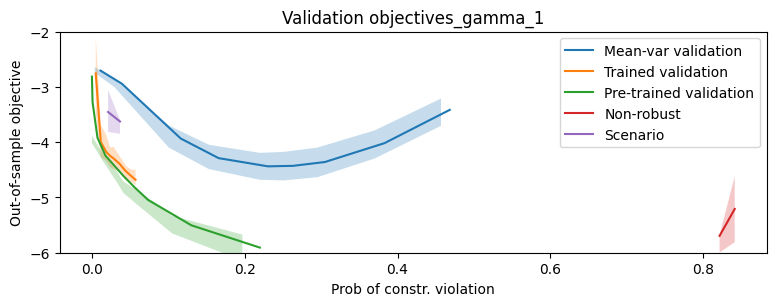

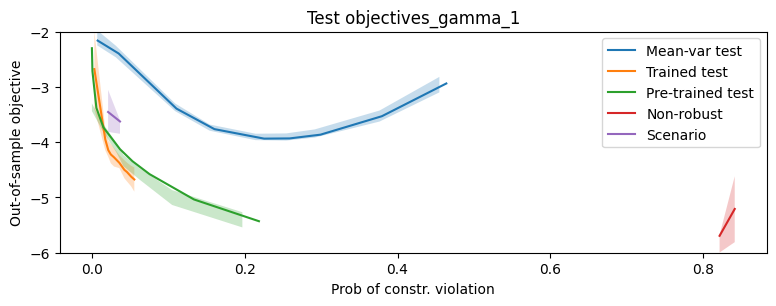

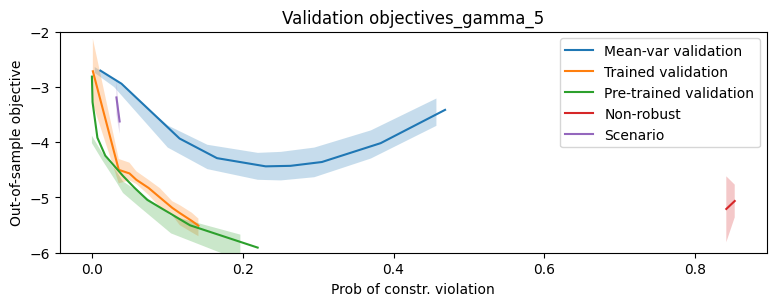

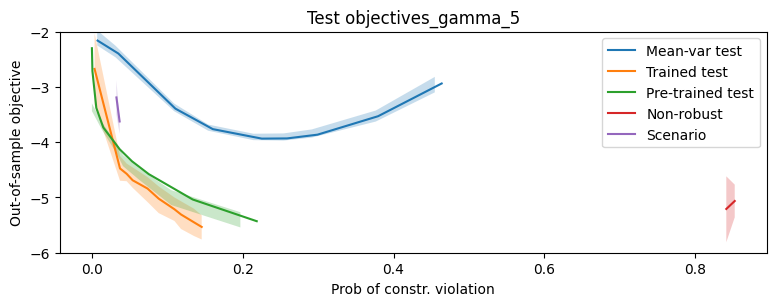

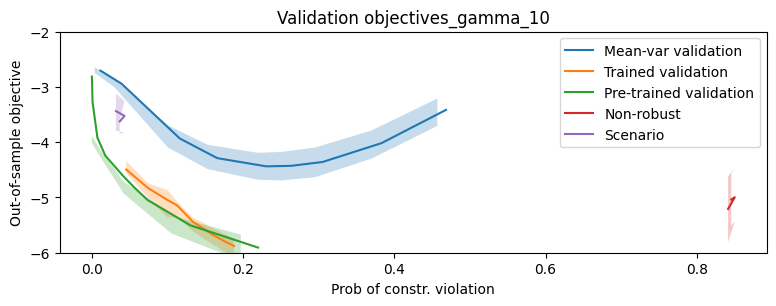

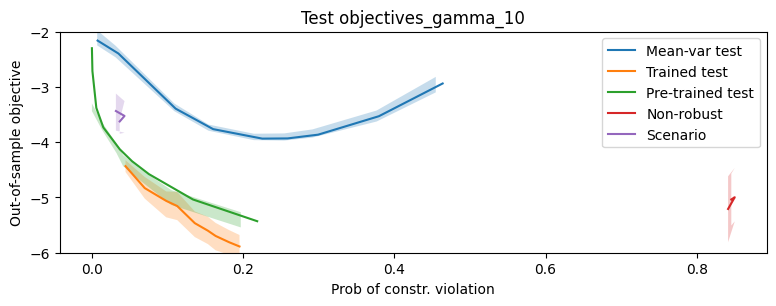

In [85]:
for idx in objs:
    plot_compare(dfs,idx,dfs_grid,dfs_mv_grid,valid=True)
    plot_compare(dfs,idx,dfs_grid,dfs_mv_grid,valid=False)

In [86]:
dfs_cat = []
running_ind = 0
for eta in etas:
    for obj in objs:
        for seed in seeds1:
            newfolder = foldername1+str(running_ind)
            try:
                df = pd.read_csv(newfolder+"/vals.csv")
                dfs_cat.append(df)
            except:
                print(eta,obj,seed)
            running_ind += 1
running_ind = 0
for eta in etas:
    for obj in objs:
        for seed in seeds2:
            newfolder = foldername2+str(running_ind)
            try:
                df = pd.read_csv(newfolder+"/vals.csv")
                dfs_cat.append(df)
            except:
                print(eta,obj,seed)
            running_ind += 1
dfs_cat = pd.concat(dfs_cat)

0.01 1 2
0.01 1 3
0.01 1 5
0.01 5 0
0.01 5 1
0.01 5 2
0.01 5 4
0.01 5 5
0.01 10 0
0.01 10 1
0.01 10 2
0.01 10 3
0.01 10 4
0.01 10 5
0.05 10 0
0.05 10 1
0.05 10 4
0.05 10 5
0.08 10 0
0.08 10 1
0.08 10 4
0.01 1 8
0.01 1 9
0.01 1 11
0.01 5 7
0.01 5 8
0.01 5 9
0.01 5 10
0.01 5 11
0.01 10 6
0.01 10 7
0.01 10 8
0.01 10 9
0.01 10 10
0.01 10 11
0.05 10 11
0.08 10 7


In [87]:
inds = {}
target_list = [0.01,0.03,0.05,0.08,0.1,0.12,0.15,0.18,0.20]
dfs_best = {}
for target in target_list:
    inds[target] = []
    dfs_best[target] = []
    for seed in seeds1+seeds2:
        try:
            best_idx = np.argmin(np.abs(np.array(dfs_cat[dfs_cat["seed"] == seed]["valid_prob"] - target)))
            inds[target].append(best_idx)
            cur_df = dfs_cat[dfs_cat["seed"] == seed].iloc[best_idx:best_idx+1]
            dfs_best[target].append(cur_df)
        except:
            print(seed)
    dfs_best[target] = pd.concat(dfs_best[target])   
plot_data = []
for target in target_list:
    data = {'validate_prob': dfs_best[target]["valid_prob"].mean(), 'test_prob': dfs_best[target]["test_prob"].mean(),'test_obj': dfs_best[target]["test_obj"].mean(),'0.25_test_obj': dfs_best[target]["test_obj"].quantile(0.25), '0.75_test_obj': dfs_best[target]["test_obj"].quantile(0.75),
    'validate_obj': dfs_best[target]["valid_obj"].mean(),'0.25_valid_obj': dfs_best[target]["valid_obj"].quantile(0.25), '0.75_validate_obj': dfs_best[target]["valid_obj"].quantile(0.75)}
    data = pd.DataFrame(data, index=[0])
    plot_data.append(data)
plot_data = pd.concat(plot_data)
plot_data.to_csv("plot_data.csv") 

In [88]:
plot_data

,validate_prob,test_prob,test_obj,0.25_test_obj,0.75_test_obj,validate_obj,0.25_valid_obj,0.75_validate_obj
0,0.010417,0.014333,-3.812447,-4.243618,-3.647333,-3.866506,-4.334051,-3.625819
0,0.030208,0.033917,-4.341925,-4.467232,-4.208557,-4.366299,-4.619753,-4.238756
0,0.051667,0.048750,-4.632392,-4.798005,-4.444474,-4.641205,-4.790577,-4.467307
0,0.080417,0.078750,-4.928036,-5.102996,-4.828233,-4.937341,-5.188107,-4.807349
0,0.102292,0.101500,-5.170427,-5.332857,-5.039907,-5.153776,-5.373997,-4.961579
0,0.118542,0.118750,-5.317501,-5.532132,-5.272086,-5.293142,-5.519065,-5.239024
0,0.148958,0.151083,-5.568804,-5.778934,-5.404872,-5.558490,-5.828530,-5.409771
0,0.176667,0.181750,-5.789536,-5.972798,-5.679236,-5.772809,-5.944787,-5.743140
0,0.182917,0.191667,-5.861062,-6.110337,-5.679236,-5.850754,-6.047548,-5.743140


In [89]:
dfs_best[target_list[0]]

,seed,eta,gamma,init_rho,rho,valid_obj,valid_prob,test_obj,test_prob,nonrob_prob,nonrob_obj,scenario_probs,scenario_obj
0,0,0.08,1,1,1.018209,-4.462476,0.0100,-4.410548,0.026,0.818,-5.752787,0.040,-4.037362
0,1,0.01,1,1,0.601811,-3.492639,0.0075,-3.408632,0.001,0.812,-6.107539,0.000,-3.673412
0,2,0.05,1,1,0.988552,-4.240474,0.0050,-4.118432,0.025,0.829,-5.360110,0.064,-3.394888
0,3,0.05,5,1,0.498144,-4.324944,0.0125,-4.254579,0.023,0.896,-4.473095,0.034,-3.808801
0,4,0.01,1,1,0.742887,-4.361372,0.0125,-4.259747,0.010,0.810,-6.002620,0.000,-3.833753
0,5,0.05,1,1,0.993396,-3.670212,0.0050,-3.833097,0.016,0.874,-4.447461,0.151,-4.171449
0,6,0.10,1,1,1.049143,-4.152253,0.0075,-4.230143,0.019,0.809,-5.656445,0.031,-2.575666
0,7,0.01,1,1,0.006032,-2.145715,0.0075,-2.104460,0.001,0.855,-4.666979,0.056,-3.762129
0,8,0.05,1,1,0.998811,-3.687523,0.0175,-3.772422,0.008,0.837,-4.171265,0.028,-3.776514
0,9,0.05,1,1,0.969918,-4.662380,0.0125,-4.239964,0.017,0.868,-4.952198,0.009,-3.896715


In [90]:
dfs_best[target_list[5]]

,seed,eta,gamma,init_rho,rho,valid_obj,valid_prob,test_obj,test_prob,nonrob_prob,nonrob_obj,scenario_probs,scenario_obj
0,0,0.23,5,1,0.939645,-5.605508,0.1200,-5.528382,0.133,0.818,-5.752787,0.040,-4.037362
0,1,0.12,5,1,0.946454,-5.515102,0.1250,-5.543381,0.094,0.812,-6.107539,0.000,-3.673412
0,2,0.25,5,1,0.922761,-5.484491,0.1250,-5.303621,0.154,0.829,-5.360110,0.064,-3.394888
0,3,0.23,5,1,0.975462,-5.273568,0.1175,-5.276658,0.123,0.896,-4.473095,0.034,-3.808801
0,4,0.12,5,1,0.938218,-5.363184,0.1150,-5.360156,0.120,0.810,-6.002620,0.000,-3.833753
0,5,0.20,5,1,0.971754,-5.491568,0.1100,-5.688922,0.106,0.874,-4.447461,0.151,-4.171449
0,6,0.20,5,1,0.997780,-5.135391,0.1175,-5.258371,0.100,0.809,-5.656445,0.031,-2.575666
0,7,0.10,10,1,0.563601,-4.890889,0.1150,-4.916629,0.118,0.855,-4.666979,0.056,-3.762129
0,8,0.20,5,1,1.057368,-4.339308,0.1200,-4.472756,0.108,0.837,-4.171265,0.028,-3.776514
0,9,0.18,10,1,0.862469,-5.530953,0.1125,-5.351976,0.140,0.868,-4.952198,0.009,-3.896715


In [91]:
# plt.rcParams.update({
#     "text.usetex":True,
#     "font.size":24,
#     "font.family": "sans-serif"
# })
def plot_best(plot_data,dfs,dfs_grid,dfs_mv_grid,ylim=[-6,-2]):
    idx = 1
    plt.figure(figsize = (8,3))
    plt.plot(np.array(dfs_mv_grid["mean_Avg_prob_test"]),np.array(dfs_mv_grid["mean_Test_val"]),label = "Mean-var test",marker = "^")
    plt.fill_between(np.array(dfs_mv_grid["0.25_Avg_prob_test"]),np.array(dfs_mv_grid["0.25_Test_val"]),np.array(dfs_mv_grid["0.75_Test_val"]),alpha = 0.25)
    
    plt.scatter(np.array(plot_data["test_prob"]),np.array(plot_data["test_obj"]), label = "Trained test" ,color = "tab:orange",marker = "D")
    plt.fill_between(np.array(plot_data["test_prob"]),np.array(plot_data["0.25_test_obj"]),np.array(plot_data["0.75_test_obj"]),alpha = 0.25, color = "tab:orange")

    plt.plot(np.array(dfs_grid["mean_Avg_prob_test"]),np.array(dfs_grid["mean_Test_val"]),label = "Pre-trained test",marker = "v",color = "tab:green")
    plt.fill_between(np.array(dfs_grid["0.25_Avg_prob_validate"]),np.array(dfs_grid["0.25_Test_val"]),np.array(dfs_grid["0.75_Test_val"]),alpha = 0.25,color = "tab:green")
        
    plt.plot(np.array(dfs[idx]["mean_nonrob_prob"])[1:],np.array(dfs[idx]["mean_nonrob_obj"])[1:],label = "Non-robust",color = "tab:pink",marker = "s")
    plt.fill_between(np.array(dfs[idx]["mean_nonrob_prob"])[1:],np.array(dfs[idx]["0.25_nonrob_obj"])[1:],np.array(dfs[idx]["0.75_nonrob_obj"])[1:],alpha = 0.25,color = "tab:pink")
    plt.plot(np.array(dfs[idx]["mean_scenario_probs"])[1:],np.array(dfs[idx]["mean_scenario_obj"])[1:],label = "Scenario",color = "tab:purple",marker = "o")
    plt.fill_between(np.array(dfs[idx]["mean_scenario_probs"])[1:],np.array(dfs[idx]["0.25_scenario_obj"])[1:],np.array(dfs[idx]["0.75_scenario_obj"])[1:],alpha = 0.25,color = "tab:purple")
    plt.vlines(target_list,ymin = -6,ymax=-2,linestyles=":",color = "red")
    plt.legend()
    plt.xlabel("Prob of constr. violation")
    plt.ylabel("Out-of-sample objective")
    plt.ylim(ylim)
    plt.tight_layout()
    plt.title("Test objectives_"+"gamma_"+str(idx))
    # plt.savefig("Test_objectives_best.pdf")
    plt.show()

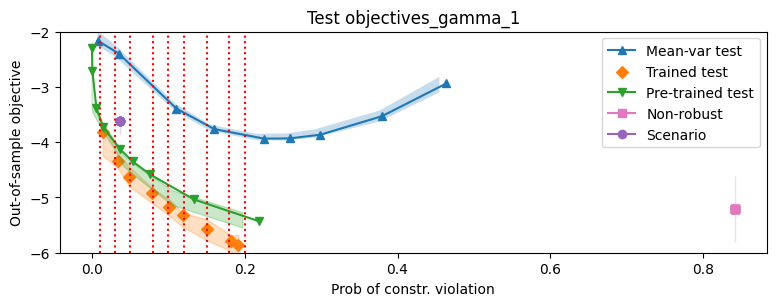

In [92]:
plot_best(plot_data,dfs,dfs_grid,dfs_mv_grid)